<a href="https://colab.research.google.com/github/Jhanvi-ctrl/Medical-cost-prediction/blob/main/Medical_cost_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
medi= pd.read_csv('/content/drive/MyDrive/Dataset/Medical cost.csv')
medi.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
medi.shape

(1338, 7)

In [ ]:
medi.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
medi.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<Axes: >

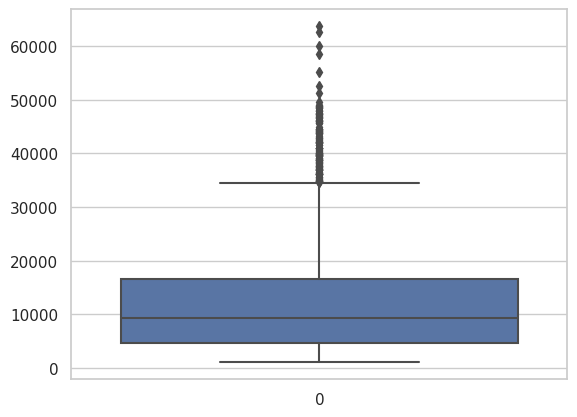

In [ ]:
#Understanding about columns
sns.set_theme(style="whitegrid")
sns.boxplot(medi['charges'])

<Axes: >

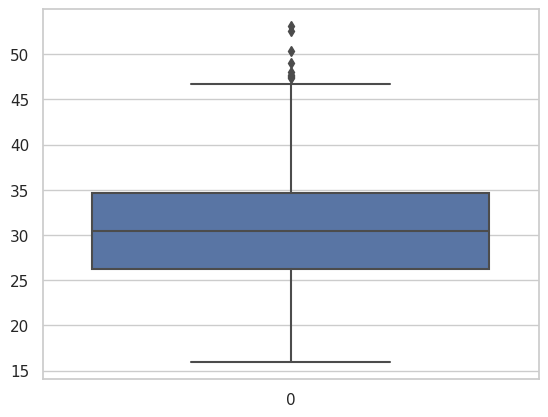

In [ ]:
sns.boxplot(medi['bmi'])

In [ ]:
medi[['sex','age']].groupby('sex').agg(['mean','count'])

age      
             mean count
sex                    
female  39.503021   662
male    38.917160   676

In [ ]:
medi['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [ ]:
medi[['sex','children']].groupby('sex').agg(['mean'])


,children
,mean
sex,
female,1.074018
male,1.115385


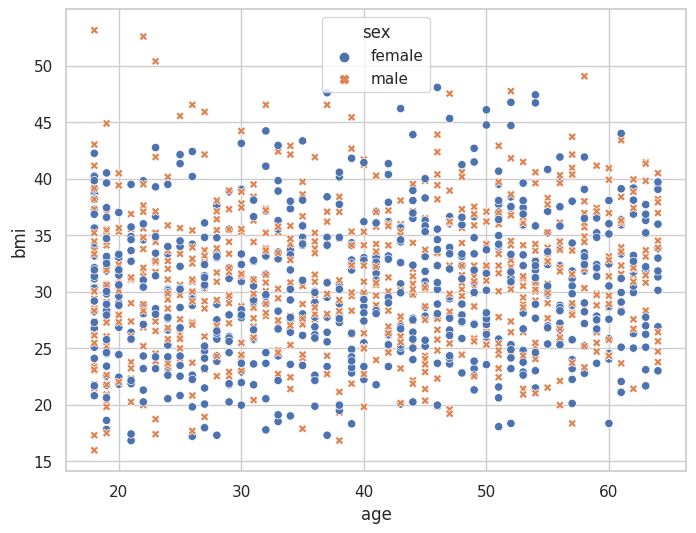

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=medi, x="age", y="bmi", hue="sex", style="sex")
plt.show()

<Axes: xlabel='age', ylabel='charges'>

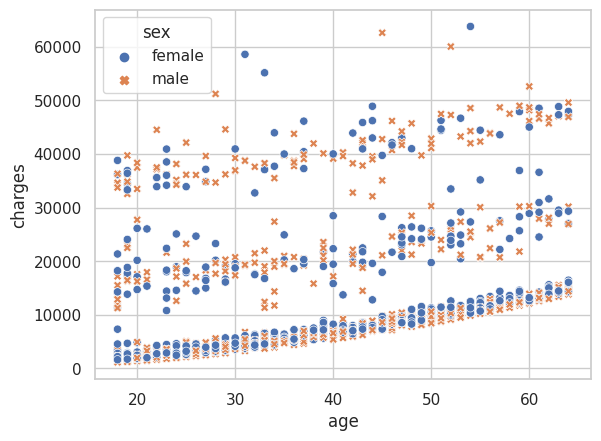

In [ ]:
sns.scatterplot(data=medi, x="age", y="charges", hue="sex", style="sex")


<Axes: xlabel='age', ylabel='charges'>

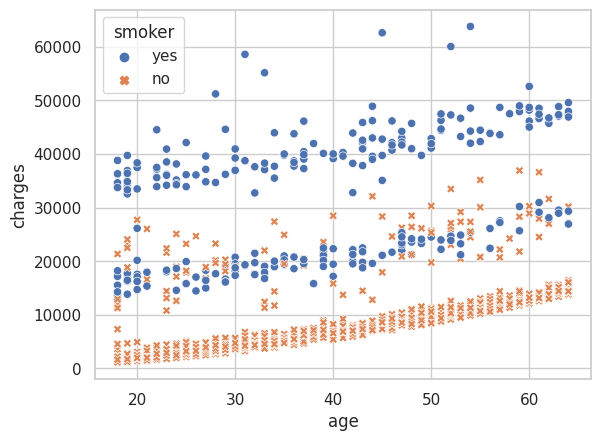

In [ ]:
sns.scatterplot(data=medi, x="age", y="charges", hue="smoker", style="smoker")

In [ ]:
#removing outliers
medi=medi[medi['bmi']<47]
medi.shape

(1329, 7)

In [ ]:
#finding categorical data
medi['smoker'].value_counts()

no     1058
yes     271
Name: smoker, dtype: int64

In [ ]:
medi['region'].value_counts()

southeast    357
northwest    325
southwest    324
northeast    323
Name: region, dtype: int64

In [ ]:
medi['sex'].value_counts()

male      670
female    659
Name: sex, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
def label_encoded(feat):
  le=LabelEncoder()
  le.fit(feat)
  print(feat.name, le.classes_)
  return le.transform(feat)

In [ ]:
name_list=['sex','smoker','region']

In [ ]:
for name in name_list:
  medi[name]=label_encoded(medi[name])

medi.head()

sex ['female' 'male']
smoker ['no' 'yes']
region ['northeast' 'northwest' 'southeast' 'southwest']


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


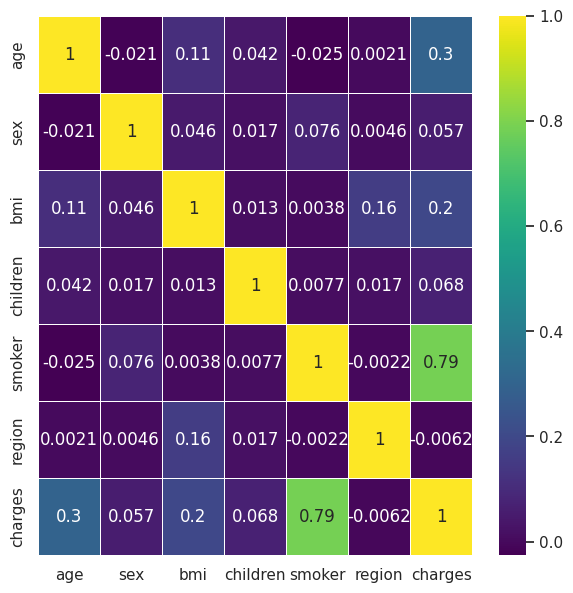

In [ ]:
plt.figure(figsize=(7,7))
sns.heatmap(medi.corr(),annot=True, cmap='viridis', linewidth=.5)
plt.show()

In [ ]:
y=medi['charges']
X=medi.drop(['charges'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor

In [ ]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2, random_state=42)

In [ ]:
random_model=RandomForestRegressor(n_estimators=250,n_jobs=-1)

In [ ]:
#fit
random_model.fit(Xtrain,ytrain)
y_pred=random_model.predict(Xtest)

#checking the accuracy
random_model_accuracy=round(random_model.score(Xtrain,ytrain)*100,2)
print(round(random_model_accuracy, 2),'%')

97.59 %


In [ ]:
random_model_accuracy1=round(random_model.score(Xtest,ytest)*100,2)
print(round(random_model_accuracy1, 2),'%')

86.55 %


In [ ]:
import pickle
saved_model=pickle.dump(random_model, open('/content/drive/MyDrive/Dataset/Medical cost.pickle','wb'))